> 
# Project:TMDB movie data analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>  The Movie Database (TMDb) is a popular, user editable database for movies and TV shows.This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


### Question(s) for Analysis
* Which genres are most popular from year to year? 
* What kinds of properties are associated with movies that have high revenues?
 

### Data Gathering

In the cell below, i have downloaded the piece of data needed for this project which was gotten from udacity.com

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_frame = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [101]:
data_frame.sample(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1445,28211,tt1352824,1.145724,15000000,8459458,Chloe,Julianne Moore|Liam Neeson|Amanda Seyfried|Max...,NaN,Atom Egoyan,"If the one you love was lying to you, how far ...",...,A doctor hires an escort to seduce her husband...,96,Drama|Thriller|Mystery,"StudioCanal|Montecito Picture Company, The|Out...",3/25/09,297,5.9,2009,1.524601e+07,8.598197e+06
1000,299939,tt2769184,0.324403,0,0,Debug,Jeananne Goossen|Adrian Holmes|Adam Butcher|Ja...,NaN,David Hewlett,Evil can't be deleted.,...,Six young computer hackers sent to work on a d...,86,Horror|Science Fiction,Copperheart Entertainment|Monkeys & Parrots,11/3/14,24,4.0,2014,0.000000e+00,0.000000e+00
4411,49529,tt0401729,1.588457,260000000,284139100,John Carter,Taylor Kitsch|Lynn Collins|Mark Strong|Willem ...,http://disney.go.com/johncarter/,Andrew Stanton,Lost in Our World. Found in Another.,...,Civil War vet John Carter is transplanted to M...,132,Action|Adventure|Fantasy|Science Fiction,Walt Disney Pictures,3/7/12,1479,6.0,2012,2.469335e+08,2.698595e+08
1089,243352,tt3200980,0.129935,0,1156000,Where Hope Grows,Danica McKellar|William Zabka|Kerr Smith|McKal...,http://wherehopegrowsmovie.com/,Chris Dowling,AN UNEXPECTED JOURNEY. AN UNEXPECTED FRIENDSHIP.,...,Calvin Campbell is a former professional baseb...,95,Drama,Godspeed Pictures,4/6/14,19,7.2,2014,0.000000e+00,1.064781e+06
883,256474,tt2101570,0.536511,10000000,0,In the Blood,Gina Carano|Cam Gigandet|Luis GuzmÃ¡n|Danny Tr...,NaN,John Stockwell,She Will Stop At Nothing,...,When her husband goes missing during their Car...,108,Action|Crime|Thriller,20th Century Fox Home Entertainment|Anchor Bay...,4/4/14,77,5.2,2014,9.210911e+06,0.000000e+00
8202,27526,tt0112744,0.286585,0,0,The Crossing Guard,Jack Nicholson|David Morse|Anjelica Huston|Rob...,NaN,Sean Penn,"...some lives cross, others collide.",...,"After his daughter died in a hit and run, Fred...",111,Drama|Thriller,Miramax Films,11/15/95,24,5.8,1995,0.000000e+00,0.000000e+00
5422,109445,tt2294629,6.112766,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,http://movies.disney.com/frozen,Chris Buck|Jennifer Lee,Only the act of true love will thaw a frozen h...,...,Young princess Anna of Arendelle dreams about ...,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,11/27/13,3369,7.5,2013,1.404050e+08,1.192711e+09
3891,98857,tt2115386,0.028803,0,0,Scrat's Continental Crack-Up: Part 2,Chris Wedge,NaN,Steve Martino|Mike Thurmeier,NaN,...,This short film continues the adventures of th...,3,Animation|Comedy|Adventure,Blue Sky Studios,11/16/11,11,6.7,2011,0.000000e+00,0.000000e+00
5177,5653,tt0309820,0.619899,0,0,Luther,Joseph Fiennes|Jonathan Firth|Claire Cox|Alfre...,http://www.lutherthemovie.com/,Eric Till,NaN,...,During the early 16th Century idealistic Germa...,123,Drama|History,Eikon Film,10/29/03,46,6.3,2003,0.000000e+00,0.000000e+00
5398,43274,tt0131620,0.170210,0,0,Tower of Terror,Steve Guttenberg|Kirsten Dunst|Nia Peeples|Mic...,NaN,D.J. MacHale,Hotel Guest Check In...But They Don't Check Out!,...,A disgraced reporter investigates an abandoned...,89,Thriller|Comedy|Family|Horror,Walt Disney Television,10/26/97,22,5.8,1997,0.000000e+00,0.000000e+00


In [102]:
data_frame.shape

(10866, 21)

### Accessing Data

In [103]:
for i,j in enumerate(data_frame):
    print(i,j)#index of each columns

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


In [104]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [105]:
data_frame.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [106]:
data_frame.duplicated().sum()

1

In [107]:
data_frame.genres

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 10866, dtype: object

### Quality issues
1.wrong data type for release date

2.Duplicated value present

3.Null values in production_companies, genres, cast, homepage, director, tagline, keywords, overview and imdb_id  

4.some values in revenue and budget columns is zero



### Data Cleaning


In [108]:
#making copy of the original data
data = data_frame.copy()

In [109]:
#dropping null valuues
data_frame.dropna(inplace=True)

In [110]:
data_frame.drop_duplicates(inplace=True)#dropping duplicates

In [111]:
#droping all entries with 0 as input
data_frame = data_frame[(data_frame != 0).all(1)]

In [112]:
#converting release date column to date time 
data_frame['release_date'] = pd.to_datetime(data_frame['release_date'])

In [113]:
#since i won't be using some of these columns, i'll just drop them.
data_frame.drop(['homepage', 'tagline', 'keywords'], axis=1, inplace=True)

#### Test

In [114]:
data_frame.sample()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4460,86838,tt1931533,0.958518,15000000,19422261,Seven Psychopaths,Colin Farrell|Sam Rockwell|Christopher Walken|...,Martin McDonagh,A struggling screenwriter inadvertently become...,110,Comedy|Crime|Thriller,Blueprint Pictures|CBS Films|British Film Inst...,2012-09-07,773,6.6,2012,1.424616e+07,1.844618e+07


In [115]:
#checking if any 0 is in data_frame
count = 0
for i in data_frame.revenue:
    if i == 0:
        count += 1
print(count)


0


In [116]:
#checking dropped columns
data_frame.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [117]:
b = ('homepage', 'tagline', 'keywords')
assert b not in data_frame.columns

In [118]:
#checking duplicated values
data_frame.duplicated().sum()

0

In [119]:
#checking for null values
data_frame.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [120]:
data_frame.shape

(1287, 18)

### Storing Data
Saving gathered, assessed, and cleaned master dataset to a CSV file named "tmdb-movies-clean.csv".

In [121]:
data_frame.to_csv("TMDB-movies-clean.csv", index=False)

In [3]:
df = pd.read_csv('TMDB-movies-clean.csv')

<a id='eda'></a>
## Exploratory Data Analysis


#### What kinds of properties are associated with movies that have high revenues?

> dependant variable here is revenue
 

##### is vote count associated with high revenu?

In [123]:
df.describe().vote_count

count    1287.000000
mean      947.266511
std      1255.476215
min        10.000000
25%       179.000000
50%       439.000000
75%      1173.000000
max      9767.000000
Name: vote_count, dtype: float64

In [5]:
#creating a bin edge value and name for a new column
vals = [10, 179, 439, 1173, 9767]
val_names = ['poor', 'moderate', 'mod_high', 'high']

In [6]:
#creating new column
df['vote_levels'] = pd.cut(df['vote_count'], vals, labels=val_names)

In [126]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_levels
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,high
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,high


In [127]:
df.groupby('vote_levels').mean().revenue

vote_levels
poor        2.529717e+07
moderate    7.326995e+07
mod_high    1.477218e+08
high        4.588060e+08
Name: revenue, dtype: float64

In [128]:
#for 2010 inflation rate
df.groupby('vote_levels').mean().revenue_adj

vote_levels
poor        2.850896e+07
moderate    9.746905e+07
mod_high    1.682744e+08
high        5.026439e+08
Name: revenue_adj, dtype: float64

In [129]:
#does high vote count mean high popularity of a movie?
df.groupby('vote_levels').mean().popularity

vote_levels
poor        0.549302
moderate    1.021225
mod_high    1.593226
high        3.981535
Name: popularity, dtype: float64

In [130]:
#is their is correlation between budget and revenue?
df[['budget', 'revenue']].mean()

budget     5.200349e+07
revenue    1.762444e+08
dtype: float64

In [131]:
df[['budget_adj', 'revenue_adj']].mean()

budget_adj     5.462994e+07
revenue_adj    1.991775e+08
dtype: float64

### Which genres are most popular from year to year?

dependant variable here is genre

In [43]:
print(df['popularity'].min())
print(df['popularity'].median())
print(df['popularity'].max())

0.010335
1.152354
32.985763


In [49]:
#selecting popularity greater than or equal to 15 which is almost at the highest level
bf = df.query('popularity >= 12')

In [50]:

bf[['genres', 'release_year']]

,genres,release_year
0,Action|Adventure|Science Fiction|Thriller,2015
1,Action|Adventure|Science Fiction|Thriller,2015
2,Adventure|Science Fiction|Thriller,2015
93,Adventure|Drama|Science Fiction,2014
94,Action|Science Fiction|Adventure,2014
95,Action|Adventure|Science Fiction,2014
163,Adventure|Action|Science Fiction,1977


In [135]:
#movies with popularity >= 10
bf[['genres', 'release_year', 'popularity' , 'original_title', 'revenue', 'budget']]

,genres,release_year,popularity,original_title,revenue,budget
0,Action|Adventure|Science Fiction|Thriller,2015,32.985763,Jurassic World,1513528810,150000000
1,Action|Adventure|Science Fiction|Thriller,2015,28.419936,Mad Max: Fury Road,378436354,150000000
2,Adventure|Science Fiction|Thriller,2015,13.112507,Insurgent,295238201,110000000
3,Action|Adventure|Science Fiction|Fantasy,2015,11.173104,Star Wars: The Force Awakens,2068178225,200000000
93,Adventure|Drama|Science Fiction,2014,24.949134,Interstellar,621752480,165000000
94,Action|Science Fiction|Adventure,2014,14.311205,Guardians of the Galaxy,773312399,170000000
95,Action|Adventure|Science Fiction,2014,12.971027,Captain America: The Winter Soldier,714766572,170000000
96,Action|Thriller,2014,11.422751,John Wick,78739897,20000000
97,Science Fiction|Adventure|Thriller,2014,10.739009,The Hunger Games: Mockingjay - Part 1,752100229,125000000
98,Adventure|Fantasy,2014,10.174599,The Hobbit: The Battle of the Five Armies,955119788,250000000


### Insights

1. movies with high vote count generate high revenue
2. movies with high vote count are very popular or have high popularity
3. movie genre that has been popular from year to year are adventure, action, fantasy, science fiction, and thriller
4. high budget movies yielded  high revenues
5. more movies are released in the 2000s than the 90s

### Visualizations

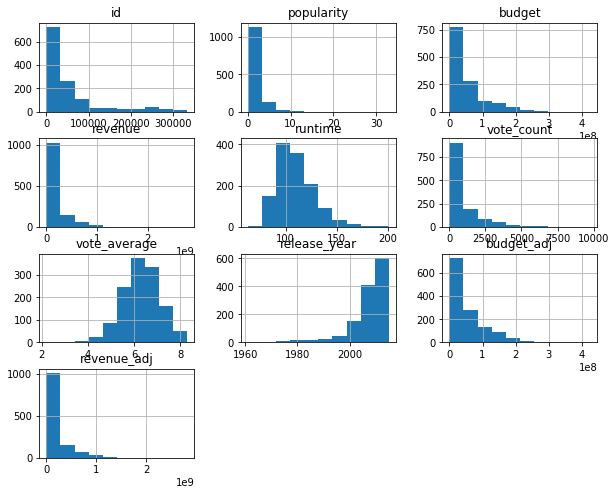

In [137]:
df.hist(figsize=(10, 8));

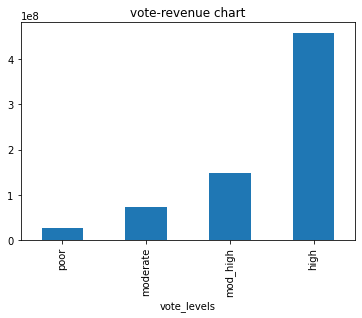

In [138]:
#grouping movies with revenue by votes 
df.groupby("vote_levels").revenue.mean().plot(kind='bar', y='revenue', title='vote-revenue chart');

the above chart represents vote count and revenue, from what can be observed it is clear that most movies with high votes generated high revenue.

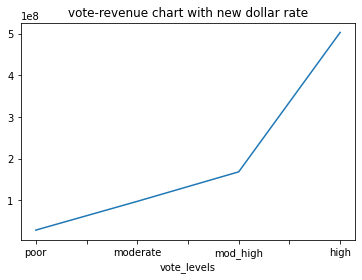

In [139]:
#as of 2010 dollar rate
df.groupby("vote_levels").revenue_adj.mean().plot(kind='line', title='vote-revenue chart with new dollar rate');

this show that the higher the vote count of a movie, the higher the revenue generated 

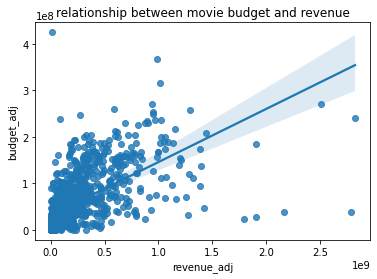

In [140]:
# correllation between high budget movies and high revenue?
sns.regplot(x='revenue_adj', y='budget_adj', data=df).set(title='relationship between movie budget and revenue');

it seems in most cases, high budget movies generate high revenue since it has an upward regression line

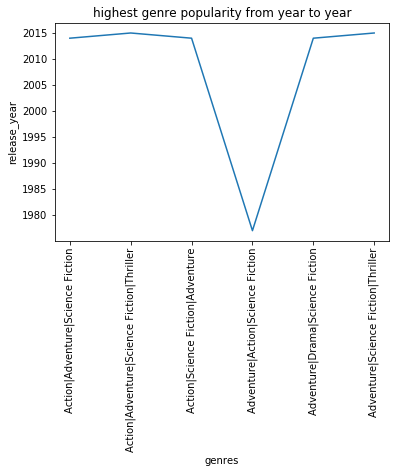

In [53]:
def gen_pop(gen=bf['genres'], year=bf['release_year']):
    g = sns.lineplot(x=gen, y=year, data=df) .set(title='highest genre popularity from year to year');
    plt.xticks(rotation='vertical')
    plt.show()
    
    
gen_pop()


the above chart shows the genre of movie release that has been most popular from year to year.